# Principal component analysis (PCA)

In this notebook we will learn how to apply PCA to a given dataset using the <a href="https://scikit-learn.org/stable/" target="_blank">scikit-learn</a> library. 

Principal component analysis (PCA) is possibly the most used technique for feature extraction. Intuitively PCA attempts to achieve a representation of a dataset in a smaller dimensional space while minimizing the quadratic error committed. PCA does that by identifiying the combination of attributes (principal components, or directions in the original feature space) that account for the most variance in the data. 

**Note**: If you are running this in [a colab notebook](https://colab.research.google.com/github/skorch-dev/skorch/blob/master/notebooks/MNIST.ipynb), you should install the dependencies by running the following cell:

In [1]:
! pip install scikit-learn matplotlib scipy

First we load the Iris dataset.

In [2]:
from sklearn.datasets import load_iris

iris = load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names

Now we create an instance of the <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA"><code>sklearn.decomposition.PCA</code></a> class, indicating the desired dimensionality reduction with <code>n_components=2</code>, and fit the model to our data with the <code>fit()</code> method. Remember that the original data has 4 components, i.e. the features' data matrix is an ndarray of shape <code>(150, 4)</code>. By default the input data is centered but not scaled for each feature before applying the SVD.

In [3]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

Once the model is learned we can apply dimensionality reduction to X. This is, we can project feature vectors from the original space to the new 2D feature space using the <code>transform()</code> method.

X is projected on the first principal components previously extracted from the training set.

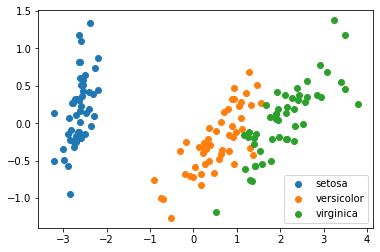

In [4]:
X_transformed = pca.transform(X)


# display the projected dataset
import matplotlib.pyplot as plt
for i, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X_transformed[y == i, 0], X_transformed[y == i, 1], label=target_name)
plt.legend()

We can get the percentage of variance explained by each of the selected components from the <code>pca.explained_variance_ratio_</code> attribute.

In [5]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


### Principal component analysis (PCA) and singular value decomposition (SVD)

The <a href="https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html#sklearn.decomposition.PCA"><code>sklearn.decomposition.PCA</code></a> class parameter <code>svd_solver</code> is set by default to <code>‘auto’</code>. Which means that the solver is selected by a default policy based on <code>X.shape</code> and <code>n_components</code>: if the input data is larger than 500x500 and the number of components to extract is lower than 80% of the smallest dimension of the data, then the more efficient <code>‘randomized’</code> method is enabled. Otherwise the exact full SVD is computed and optionally truncated afterwards.

This means for the case of the Iris data we can obtain the same results by computing the exact full SVD. We can do this with the <code>scipy.linalg.svd</code> implementation as follows:

In [6]:
from scipy.linalg import svd

# zero center the data
X_centered = X - X.mean(axis=0)

# perform SVD
U, s, VT = svd(X_centered)

# compare the obtained singular values and components with the ones used by the sklearn PCA model
print(s)
print(pca.singular_values_)

print(VT)
print(pca.components_)

[25.09996044  6.01314738  3.41368064  1.88452351]
[25.09996044  6.01314738]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [-0.65658877 -0.73016143  0.17337266  0.07548102]
 [ 0.58202985 -0.59791083 -0.07623608 -0.54583143]
 [ 0.31548719 -0.3197231  -0.47983899  0.75365743]]
[[ 0.36138659 -0.08452251  0.85667061  0.3582892 ]
 [ 0.65658877  0.73016143 -0.17337266 -0.07548102]]


We appreciate hat the first two singular values and components found are the same. Notice that there may be a reverse sign for some of the components but they are equivalent. For example, in a 2D space the vectors (1,1) and (−1,−1) represent the same line. When you find an eigenvector, what's uniquely determined is the line, not the actual vector.

Now we can project the Iris data into the two principal components found:

(1.0, -1.5)

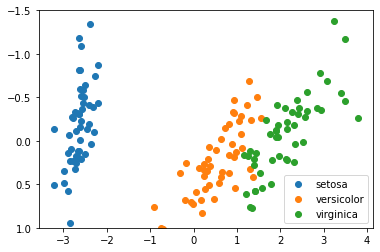

In [12]:
X_tr = X_centered.dot(VT[:2,:].T)

# display the projected dataset
import matplotlib.pyplot as plt
for i, target_name in zip([0, 1, 2], target_names):
    plt.scatter(X_tr[y == i, 0], X_tr[y == i, 1], label=target_name)
plt.legend()
plt.ylim(1.0, -1.5) # Invert the y axis to make the plot equivalent to the previous one
                    # This is because the sign of the second component was inverted